# Class 15: Probability Part II

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; Alexander Dowling, University of Notre Dame

## Class 15 Learning Objectives

After attending class, completing these activities, asking questions, and studying notes, you should be able to:
* Give at least three examples of how an engineer would use statistics
* Explain the difference between a random variable (upper case) and realization (lower case)
* Convert a probability density/mass function into a cumulative distribution function
* Convert between conditional, marginal, and joint probability distributions
* Explain the relationship between covariance, correlation, and independence
* Derive mean and variance for a function of random variables from a density/mass function using the definition of expected value

<div style="background-color: rgba(255,0,0,0.05) ; padding: 10px; border: 1px solid darkred;"> 
<b>Note</b>: All of these home activities are optional. They will count as extra credit and are due Monday, March 16 @ 10am via Vocareum.
</div>

## Statistics: Using Data to ...

### 1. Describe the World

https://istats.shinyapps.io/EDA_quantitative/

### 2. Draw Conclusions (Inferences)

https://istats.shinyapps.io/Inference_prop/

https://istats.shinyapps.io/Association_Categorical/

### 3. Make Decisions Under Uncertainty

**Example: Chemical Reactor Design**

Recall the phenolphthalein reaction from Lecture 6:

$$
\frac{d[P]}{dt} = -k_{1}[P][OH^-]+k_{2}[POH] ~,
$$

with the analytic solution:

$$
[P] = [P]_{0}\Big(\frac{k_{2}}{k_{1}'+k_{2}}+\frac{k_{1}'}{k_{1}'+k_{2}}e^{-(k_{1}'+k_{2})t}\Big) ~.
$$

We can use use nonlinear regression to estimate the reaction kinetic parameters $k'_1$ and $k_2$.

This example illustrates a common workflow in chemical engineering:

1. Run several experiments at different temperatures, pressures, and feed compositions. Measure compositions at several times as chemical reactions occur.
2. Use nonlinear regression to estimate kinetic model parameters.
3. Use statistical inference to quantify uncertainty in fitted parameters.
4. How much should we oversize/overdesign the reactor to account for the uncertainty in the fitted reaction kinetic parameters?

You will practice this workflow in either a Mini-Project or the Final Project this semester.

## 15a. Random Variables

**Further Reading**: §2.4 in Navidi (2015)

### Practice Problem 2.4-A

Reference: §2.4, Problem 10 in Navidi.

Microprocessing chips are randomly sampled one by one from a large population, and tested to determine if they are acceptable for a certain application. Ninety percent of the chips in the population are acceptable.
1. What is the probability that the first chip chosen is acceptable?
2. What is the probability that the first chip is unacceptable, and the second is acceptable?
3. Let $X$ represent the number of chips that are tested up to and including the first acceptable chip. Find $P(X=3)$.
4. Find the probability mass function of $X$.

### Practice Problem 2.4-B

Reference: §2.4, Problem 20 in Navidi.

The main bearing clearance (in mm) in a certain type of engine is a random variable with probability density function:

$$ f(x)=   \left\{
\begin{array}{ll}
		625x  & 0 < x \leq 0.04 \\
		50 - 625x & 0.04 < x \leq 0.08 \\
        0 & \mathrm{otherwise}
\end{array} 
\right.  $$

1. What is the probability that the clearance is less than 0.02 mm?
2. Find the mean clearance.
3. Find the standard deviation of the clearances.
4. Find the cumulative distribution function of the clearance.
5. Find the median clearance.
6. The specification for the clearance is 0.015 to 0.063 mm. What is the probability that the specification is met?

### Another Example: Discrete Random Variables

#### Example: Flipping Two Independent Coins

Imagine we have two coins: A and B.

$$P(A=\mathrm{Head}) = 0.6$$

$$P(B=\mathrm{Head}) = 0.5$$

Further assume the outcome of these two coins is independent. Let's simulate 1000 coin flips, record the results, and practice some skills from last class.

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

# number of flips
n = 1000

# store results
coin_A = []
coin_B = []

def flip_simple_coin(p):
    ''' Flip a simple coin.
    
    Args:
        p : probability of a head
        
    Returns:
        outcome: 'H' or 'T'
    '''
    
    # Generate uniformly distributed random number on [0,1)
    # then check if is in less than 1-p
    if random.random() < 1 - p:
        return 'H'
    else:
        return 'T'

for i in range(n):
    # flip coin A. Generate uniformly distributed random number on [0,1)
    # then check if is in less than 0.4
    coin_A.append(flip_simple_coin(0.6))
    
    # flip coin B
    coin_B.append(flip_simple_coin(0.4))
    
# assemble into pandas dataframe
d = {"A":coin_A, "B":coin_B}
ind_coins = pd.DataFrame(data=d)

# print first few experiments
ind_coins.head()

,A,B
0,H,H
1,T,H
2,H,T
3,T,H
4,T,T


Let's use pandas to explore the number of outcomes for each coin.

In [2]:
# Coin A
ind_coins.A.value_counts()

T    596
H    404
Name: A, dtype: int64

In [3]:
# Coin B
ind_coins.B.value_counts()

H    590
T    410
Name: B, dtype: int64

We can also use pandas to calculate the number of coin flips for each possible outcome.

In [4]:
ind_coins.groupby('A')['B'].value_counts()

A  B
H  H    240
   T    164
T  H    350
   T    246
Name: B, dtype: int64

And we can convert to frequencies by dividing by the total number of coins:

In [5]:
ind_coins.groupby('A')['B'].value_counts() / len(ind_coins)

A  B
H  H    0.240
   T    0.164
T  H    0.350
   T    0.246
Name: B, dtype: float64

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Rerun your code. Why do you expect the results to change?
</div>

I ran the simulation on my computer and saved the results to a csv file with the following command:

`ind_coins.to_csv(r'two_simple_coins.csv',index = None)`

I uploaded this file to Vocareum already.

Let's read in the data file.

In [6]:
ind_coins_saved = pd.read_csv('two_simple_coins.csv')

# print first few experiments
ind_coins_saved.head()

# determine number of coin flips
n = len(ind_coins_saved)

And now we'll repeat the analysis from above. Notice I divided everything by the number of coin flips to compute frequencies.

In [7]:
# Coin A
pA = ind_coins_saved.A.value_counts() / n
print(pA)

T    0.592
H    0.408
Name: A, dtype: float64


In [8]:
# Coin B
pB = ind_coins_saved.B.value_counts() / n
print(pB)

H    0.629
T    0.371
Name: B, dtype: float64


In [9]:
pAB = ind_coins_saved.groupby('A')['B'].value_counts() / n
print(pAB)

A  B
H  H    0.244
   T    0.164
T  H    0.385
   T    0.207
Name: B, dtype: float64


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Calculate the following probabilities from the data stored in <tt>ind_coins_saved</tt>. You may use either Python or pencil and paper. Store your answer in the Python dictionary <tt>ans_simple_coin</tt>.
</div>

Hint: This activity uses skills from the previous class.

**Probability**

$P(A = H) = $

$P(A = T) = $

$P(B = H) = $

$P(B = T) = $

**Joint Probability**

We'll introduce some shorthand. Assume the first argument is coin A and the second argument is coin B.

$P(A=H,B=H) = P(H,H) = $

$P(H,T) = $

$P(T,H) = $

$P(H,T) = $

**Conditional Probability**

$P(A = H | B = T) = $

$P(A = H | B = H) = $

$P(A = T | B = T) = $

$P(A = T | B = H) = $

In [10]:
# Store your answers in this dictionary

ans_simple_coin = {}

ans_simple_coin['P(A=H)'] = 0
ans_simple_coin['P(A=T)'] = 0
ans_simple_coin['P(B=H)'] = 0
ans_simple_coin['P(B=T)'] = 0

ans_simple_coin['P(H,H)'] = 0
ans_simple_coin['P(H,T)'] = 0
ans_simple_coin['P(T,H)'] = 0
ans_simple_coin['P(T,T)'] = 0

ans_simple_coin['P(A=H|B=T)'] = 0
ans_simple_coin['P(A=H|B=H)'] = 0
ans_simple_coin['P(A=T|B=T)'] = 0
ans_simple_coin['P(A=T|B=H)'] = 0

### BEGIN SOLUTION

ans_simple_coin['P(A=H)'] = pA['H']
ans_simple_coin['P(A=T)'] = pA['T']
ans_simple_coin['P(B=H)'] = pB['H']
ans_simple_coin['P(B=T)'] = pB['T']

ans_simple_coin['P(H,H)'] = pAB['H','T']
ans_simple_coin['P(H,T)'] = pAB['T','H']
ans_simple_coin['P(T,H)'] = pAB['T','H']
ans_simple_coin['P(T,T)'] = pAB['T','T']

ans_simple_coin['P(A=H|B=T)'] = pAB['H','T'] / pB['T']
ans_simple_coin['P(A=H|B=H)'] = pAB['H','H'] / pB['H']

ans_simple_coin['P(A=T|B=T)'] = pAB['T','T'] / pB['T']
ans_simple_coin['P(A=T|B=H)'] = pAB['T','H'] / pB['H']

print(ans_simple_coin)

### END SOLUTION

{'P(A=H)': 0.408, 'P(A=T)': 0.592, 'P(B=H)': 0.629, 'P(B=T)': 0.371, 'P(H,H)': 0.164, 'P(H,T)': 0.385, 'P(T,H)': 0.385, 'P(T,T)': 0.207, 'P(A=H|B=T)': 0.4420485175202157, 'P(A=H|B=H)': 0.38791732909379967, 'P(A=T|B=T)': 0.5579514824797843, 'P(A=T|B=H)': 0.6120826709062003}


In [11]:
### BEGIN HIDDEN TESTS

secret_ans = {'P(A=H)': 0.408, 'P(A=T)': 0.592, 'P(B=H)': 0.629, 'P(B=T)': 0.371, 'P(H,H)': 0.164, 'P(H,T)': 0.385, 'P(T,H)': 0.385, 'P(T,T)': 0.207, 'P(A=H|B=T)': 0.4420485175202157, 'P(A=H|B=H)': 0.38791732909379967, 'P(A=T|B=T)': 0.5579514824797843, 'P(A=T|B=H)': 0.6120826709062003}

for j in secret_ans.keys():
    
    assert np.abs(secret_ans[j] - ans_simple_coin[j]) < 1E-2, "Check your work for "+j

### END HIDDEN TESTS

Image we were just given the data. We do not know exactly how the data were collected. We want to determine if coins A and B are independent.

Recall, if A and B are dependent, we expect:

$$P(B | A) = P(B)$$

and equivalently

$$P(A | B) = P(A)$$

for $P(A) > 0$ and $P(B) > 0$.

Let's print out your previous answer:

In [12]:
for k in ans_simple_coin.keys():
    print(k," = ",ans_simple_coin[k])

P(A=H)  =  0.408
P(A=T)  =  0.592
P(B=H)  =  0.629
P(B=T)  =  0.371
P(H,H)  =  0.164
P(H,T)  =  0.385
P(T,H)  =  0.385
P(T,T)  =  0.207
P(A=H|B=T)  =  0.4420485175202157
P(A=H|B=H)  =  0.38791732909379967
P(A=T|B=T)  =  0.5579514824797843
P(A=T|B=H)  =  0.6120826709062003


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Inspect these values and determine if coins A and B are independent. Select from the multiple choice options below and store your answer as an integer in the Python variable <tt>ans_simple_coin_ind</tt>.
</div>

**Multiple Choice Options**:
1. Coins A and B are independent. The probabilities match exactly.
2. Coins A and B are likely independent. The probabilities are close, but do not match exactly. But we expect this, as the data were generated from a random process.
3. Coins A and B are clearly NOT independent. Nice try, but I saw through your trick.

In [13]:
### BEGIN SOLUTION
ans_simple_coin_ind = 2
### END SOLUTION

In [14]:
### BEGIN HIDDEN TESTS

assert type(ans_simple_coin_ind) == int, "Make sure your answer is an integer"

assert ans_simple_coin_ind == 2, "Check your calculations."
### END HIDDEN TESTS

### Another Example: Continous Random Variables

#### Uniform Distribution

In class, we will derive the mean and standard deviation for a random variable that follows the uniform distribution (all outcomes equally probable). Let's explore these proporties with simulation first.

Let's generate 1000 random numbers between 0 and 1 with equal probability.

In [15]:
my_nums = np.random.random(1000)

# Let's look at the first 5 elements
print(my_nums[0:5])

[0.52914475 0.93226261 0.67998699 0.49331922 0.18547693]


Now let's create a pandas data frame from your numpy array.

In [16]:
u = pd.DataFrame({'U':my_nums})
u.head()

,U
0,0.529145
1,0.932263
2,0.679987
3,0.493319
4,0.185477


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Create a histogram to visualize the simulated data.
</div>

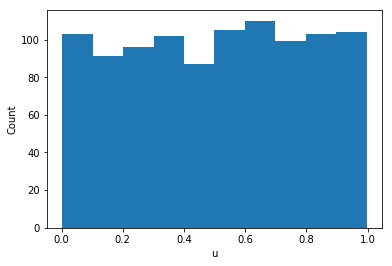

In [17]:
### BEGIN SOLUTION
plt.hist(u.U)
plt.xlabel('u')
plt.ylabel('Count')
plt.show()
### END SOLUTION

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Compute the mean and variance of the 1000 random numbers. Store your results in the Python floats <tt>u_mean</tt> and <tt>u_var</tt>.
</div>

In [18]:
### BEGIN SOLUTION
u_mean = u.U.mean()
print("mean = ",u_mean)
u_var = u.U.var()
print("var = ",u_var)
### END SOLUTION

mean =  0.5076061723768287
var =  0.08370356130672389


In [19]:
type(u_mean)

numpy.float64

In [20]:
### BEGIN HIDDEN TESTS
assert type(u_mean) == np.float64 or type(u_mean) == float, "Should be a float"
assert type(u_var) == np.float64 or type(u_var) == float, "Should be a float"
assert np.abs(u_mean - 0.5) < 0.1, "Mean should be close to 0.5"
assert u_var > 0, "Variance should be positive"
assert u_var < 0.15, "We'll see in class that variances should be near 1/12"
### END HIDDEN TESTS

## 15b. Jointly Distributed Random Variable

**Further Reading**: §2.6 in Navidi (2015)

### Practice Problem 2.6-A

Reference: §2.6, Problem 8 in Navidi.

The number of customers in line at a supermarket express checkout counter is a random variable whose probability mass function is given in the following table:

|x|0|1|2|3|4|5|
|--|--|--|--|--|--|--|
|p(x)|0.10|0.25|0.30|0.20|0.10|0.05|

For each customer, the number of items to be purchased is a random variable with probability mass function:

|y|1|2|3|4|5|6|
|--|--|--|--|--|--|--|
|p(y)|0.05|0.15|0.25|0.30|0.15|0.10|

Let $X$ denote the number of customers in line, and let $Y$ denote the total number of items purchased by all the customers in line. Assume the number of items purchased by one customer is independent of the number of items purchased by any other customer.

1. Find $P(X=2$ and $Y=2)$.
2. Find $P(X=2$ and $Y=6)$.
3. Find $P(Y=2)$.

### Practice Problem 2.6-B

Reference: §2.6, Problem 18 in Navidi.

A production facility contains two machines that are used to rework items that are initially defective. Let $X$ be the number of hours that the first machine is in use, and let $Y$ be the number of hours that the second machine is in use, on a randomly chosen day. Assume that $X$ and $Y$ have joint probability density function given by:

$$ f(x)=   \left\{
\begin{array}{ll}
		(3/2) (x^2 + y^2) & 0 < x <1 \ \mathrm{and} \ 0 < y < 1 \\
        0 & \mathrm{otherwise}
\end{array} 
\right.  $$

1. What is the probability that both machines are in operation for more than half an hour?
2. Find the marginal probability density functions $f_x(x)$ and $f_y(y)$.
3. Are $X$ and $Y$ independent? Explain.

### Another Example: Independent Random Variables

#### Simulationing Two Dependent/Correlated Coins

Let's revist the coin example, but assume the coins are NOT independent:

$$P(A) = 0.6$$

$$P(B | A) = 0.8$$ and $$P(B | \neg A) = \frac{0.5 - 0.6 \cdot 0.8}{0.4} = 0.05$$

Thus,

$$P(B | A) \cdot P(A) + P(B | \neg A) \cdot P(\neg A) = P(B)$$
$$0.8 \cdot 0.6 + 0.05 \cdot 0.4 = 0.5$$

We still have $P(A) = 0.6$ and $P(B) = 0.5$ from the original case, but we have introduced a correlation structure.

In the code below, we record 0.0 for a head and 1.0 for a tail.

In [21]:
# number of flips
n = 1000

# store results
coin_A = np.zeros(n)
coin_B = np.zeros(n)

for i in range(n):
    # flip coin A. Generate uniformly distributed random number on [0,1)
    # then check if is in less than 0.6
    coin_A[i] = 1.0*(random.random() < 0.6)
    
    # flip coin B
    if coin_A[i] < 1E-6:
        # coin A for this flip is a tail
        coin_B[i] = 1.0*(random.random() < 0.05)
    else:
        coin_B[i] = 1.0*(random.random() < 0.8)
    
# assemble into pandas dataframe
d = {"A":coin_A, "B":coin_B}
dep_coins = pd.DataFrame(data=d)

# print first few experiments
dep_coins.head()

,A,B
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0


In [22]:
# print mean (average)
dep_coins.mean()

A    0.608
B    0.499
dtype: float64

In [ ]:
# print covariance
dep_coins.cov()

,A,B
A,0.238575,0.171780
B,0.171780,0.250249


In [ ]:
# print covariance
dep_coins.corr()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Discussion</b>: Based on the simulation data, are these coins independent?
</div>